In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',500)
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
output = pd.read_csv('train_output.csv')
# output_conditional = pd.read_csv('conditional_output.csv') ## this is only second part
test = output
# test_grundy = output_conditional
before = output
#test.isnull().any()
#test[test['PERMNO']==16432]    #test to see if mkt_factor is shifted
#after = format_Grundy(before)
#after.isnull().any()

In [9]:
output.head()

,YearMonth,mkt_ret,SMB,HML,RF,PERMNO,ticker_ret,weight,ticker_excess_ret,residual,residual_sd,residual_mean,mkt_factor,SMB_factor,HML_factor,alpha,mkt_beta,SMB_beta,HML_beta,r_squared,t_alpha,t_mkt_beta,t_SMB_beta,t_HML_beta,port_mkt_beta,port_SMB_beta,port_HML_beta,residual_weight
0,192907,0.0446,-0.0388,0.0266,0.0033,10495,-0.018908,0.009379,-0.022208,-0.074377,-1.178175,-5.551115e-17,0.076208,-0.034282,0.005466,0.004777,1.708705,0.883545,0.205471,0.536700,0.711954,8.104307e-07,0.070123,0.674172,0.016026,0.008287,0.001927,0.001257
1,192907,0.0446,-0.0388,0.0266,0.0033,13311,0.053191,0.004570,0.049891,0.015213,0.344571,-6.013708e-17,0.045632,-0.007170,-0.007450,0.003666,1.023140,0.184789,-0.280081,0.414477,0.685428,1.036894e-05,0.579149,0.414343,0.004675,0.000844,-0.001280,0.002664
2,192907,0.0446,-0.0388,0.0266,0.0033,13303,-0.046358,-0.003140,-0.049658,-0.103665,-2.062318,0.000000e+00,0.044736,0.022738,-0.009325,-0.004142,1.003054,-0.586025,-0.350563,0.355833,0.687661,8.491704e-05,0.128402,0.370036,-0.003150,0.001840,0.001101,-0.010409
3,192907,0.0446,-0.0388,0.0266,0.0033,13733,0.070640,-0.018572,0.067340,0.010320,0.137756,2.235866e-17,0.018260,0.000146,0.045838,-0.007225,0.409428,-0.003756,1.723236,0.206987,0.638195,2.269760e-01,0.994686,0.005212,-0.007604,0.000070,-0.032004,-0.004772
4,192907,0.0446,-0.0388,0.0266,0.0033,15755,0.084808,0.006474,0.081508,0.043662,0.645314,3.083953e-18,0.040929,0.000732,-0.016524,0.012709,0.917683,-0.018853,-0.621185,0.162966,0.362035,4.486158e-03,0.970473,0.240135,0.005941,-0.000122,-0.004022,0.002711


In [10]:
YearMonth = list(set(test['YearMonth'].values.tolist()))

In [5]:
'''
Author: Zhikang Wang / Robin Lam
wrong trial, don't use
count_beta = individual stock beta / number of stocks per month
'''
# test = output
# df = pd.DataFrame()
# # YearMonth = YearMonth[]
# for i in YearMonth:
# #     print(i)
#     temp = test[test['YearMonth'] == i]
#     count = len(set(temp['PERMNO'].values))
#     temp['count'] = count
#     temp['mkt_count_beta'] = temp['mkt_beta']/temp['count']
#     temp['SMB_count_beta'] = temp['SMB_beta']/temp['count']
#     temp['HML_count_beta'] = temp['HML_beta']/temp['count']
    
#     test_winner = temp[temp['weight'] < 0]
#     test_loser = temp[temp['weight'] > 0]
    
#     temp['e_weight_mkt_beta_winner'] = test_winner['mkt_count_beta'].sum()
#     temp['e_weight_mkt_beta_loser'] = test_loser['mkt_count_beta'].sum()
    
#     temp['e_weight_SMB_beta_winner'] = test_winner['SMB_count_beta'].sum()
#     temp['e_weight_SMB_beta_loser'] = test_loser['SMB_count_beta'].sum()
    
#     temp['e_weight_HML_beta_winner'] = test_winner['HML_count_beta'].sum()
#     temp['e_weight_HML_beta_loser'] = test_loser['HML_count_beta'].sum()
    
#     first = temp.iloc[0]
#     df = df.append(first)

/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

# Conventional Return

In [11]:
'''
count_beta = individual stock beta / number of stocks per month
Author: Zhikang Wang / Robin Lam
'''
test = output
df_winner = pd.DataFrame()
df_loser = pd.DataFrame()

# YearMonth = YearMonth[]
for i in YearMonth:
#     print(i)
    temp = test[test['YearMonth'] == i]
    
    test_winner = temp[temp['weight'] > 0]
    test_loser = temp[temp['weight'] < 0]
    
    count_winner = len(set(test_winner['PERMNO'].values))
    count_loser = len(set(test_loser['PERMNO'].values))
    
#     temp['count'] = count
    test_winner['mkt_count_beta_winner'] = test_winner['mkt_beta']/count_winner
    test_winner['SMB_count_beta_winner'] = test_winner['SMB_beta']/count_winner
    test_winner['HML_count_beta_winner'] = test_winner['HML_beta']/count_winner
    
    test_loser['mkt_count_beta_loser'] = test_loser['mkt_beta']/count_loser
    test_loser['SMB_count_beta_loser'] = test_loser['SMB_beta']/count_loser
    test_loser['HML_count_beta_loser'] = test_loser['HML_beta']/count_loser
    
    test_winner['e_weight_mkt_beta_winner'] = test_winner['mkt_count_beta_winner'].sum()
    test_loser['e_weight_mkt_beta_loser'] = test_loser['mkt_count_beta_loser'].sum()
    
    test_winner['e_weight_SMB_beta_winner'] = test_winner['SMB_count_beta_winner'].sum()
    test_loser['e_weight_SMB_beta_loser'] = test_loser['SMB_count_beta_loser'].sum()
    
    test_winner['e_weight_HML_beta_winner'] = test_winner['HML_count_beta_winner'].sum()
    test_loser['e_weight_HML_beta_loser'] = test_loser['HML_count_beta_loser'].sum()
    
    first_winner = test_winner.iloc[0]
    first_loser = test_loser.iloc[0]
    
    df_winner = df_winner.append(first_winner)
    df_loser = df_loser.append(first_loser)

/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [12]:
df_winner['Conventional Portfolio Type'] = 'Winner'
df_loser['Conventional Portfolio Type'] = 'Loser'
df_winner = df_winner.rename(columns = {'e_weight_mkt_beta_winner':'e_weight_mkt_beta','e_weight_SMB_beta_winner':
                                       'e_weight_SMB_beta','e_weight_HML_beta_winner':'e_weight_HML_beta'})
df_loser = df_loser.rename(columns = {'e_weight_mkt_beta_loser':'e_weight_mkt_beta','e_weight_SMB_beta_loser':
                                       'e_weight_SMB_beta','e_weight_HML_beta_loser':'e_weight_HML_beta'})

train_port = pd.concat([df_winner, df_loser])
train_port['YearMonth'] = train_port['YearMonth'].astype(int)
train_port = train_port.sort_values(['YearMonth'])


/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [13]:
#train_port['Conventional Portfolio Type'] = train_port['weight'].apply(lambda x: 'Winner' if x<0 else 'Loser')
#train_port['Residual Portfolio Type'] = train_port['residual_weight'].apply(lambda x: 'Winner' if x<0 else 'Loser')
graph1 = train_port[['YearMonth','PERMNO','e_weight_mkt_beta','e_weight_SMB_beta','e_weight_HML_beta','Conventional Portfolio Type']]
graph2 = train_port[['YearMonth','mkt_ret','SMB','HML']]
graph2 = graph2.drop_duplicates() 
graph2['YearMonth'] = graph2['YearMonth'].shift(-1)
graph2 = graph2.dropna()
graph2['YearMonth'] = graph2['YearMonth'].astype(int)
graph1 = graph1[graph1['YearMonth'] != 193207]
graph = pd.merge(graph1,graph2, on = ['YearMonth'], how = 'left')
graph = graph.rename(columns = {"mkt_ret": "mkt_ret_t-1","SMB":"SMB_t-1","HML":"HML_t-1"})

/Users/zhikang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


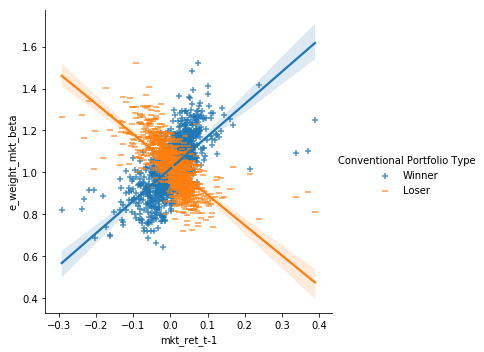

In [14]:
mkt_conventional = sns.lmplot(x="mkt_ret_t-1", y="e_weight_mkt_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('3_factor_mkt_conventional.png')
# set(xlim=(-0.4,0.6),ylim=(0,2.5))

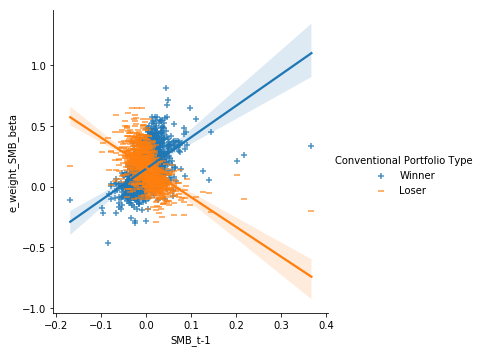

In [15]:
SMB_conventional = sns.lmplot(x="SMB_t-1", y="e_weight_SMB_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('3_factor_SMB_conventional.png')

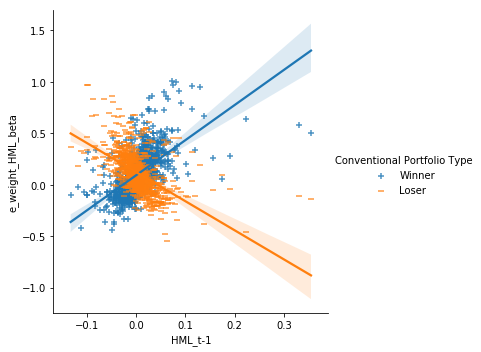

In [16]:
HML_conventional = sns.lmplot(x="HML_t-1", y="e_weight_HML_beta", hue='Conventional Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('3_factor_HML_conventional.png')

# Residual return

In [17]:
'''
count_beta = individual stock beta / number of stocks per month
Author: Zhikang Wang
'''
test = output
df_winner = pd.DataFrame()
df_loser = pd.DataFrame()

# YearMonth = YearMonth[]
for i in YearMonth:
    temp = test[test['YearMonth'] == i]
    
    test_winner = temp[temp['residual_weight'] > 0]
    test_loser = temp[temp['residual_weight'] < 0]
    
    count_winner = len(set(test_winner['PERMNO'].values))
    count_loser = len(set(test_loser['PERMNO'].values))
    
    test_winner['mkt_count_beta_winner'] = test_winner['mkt_beta']/count_winner
    test_winner['SMB_count_beta_winner'] = test_winner['SMB_beta']/count_winner
    test_winner['HML_count_beta_winner'] = test_winner['HML_beta']/count_winner
    
    test_loser['mkt_count_beta_loser'] = test_loser['mkt_beta']/count_loser
    test_loser['SMB_count_beta_loser'] = test_loser['SMB_beta']/count_loser
    test_loser['HML_count_beta_loser'] = test_loser['HML_beta']/count_loser
    
    test_winner['e_weight_mkt_beta_winner'] = test_winner['mkt_count_beta_winner'].sum()
    test_loser['e_weight_mkt_beta_loser'] = test_loser['mkt_count_beta_loser'].sum()
    
    test_winner['e_weight_SMB_beta_winner'] = test_winner['SMB_count_beta_winner'].sum()
    test_loser['e_weight_SMB_beta_loser'] = test_loser['SMB_count_beta_loser'].sum()
    
    test_winner['e_weight_HML_beta_winner'] = test_winner['HML_count_beta_winner'].sum()
    test_loser['e_weight_HML_beta_loser'] = test_loser['HML_count_beta_loser'].sum()
    
    first_winner = test_winner.iloc[0]
    first_loser = test_loser.iloc[0]
    
    df_winner = df_winner.append(first_winner)
    df_loser = df_loser.append(first_loser)

/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [18]:
df_winner['Residual Portfolio Type'] = 'Winner'
df_loser['Residual Portfolio Type'] = 'Loser'
df_winner = df_winner.rename(columns = {'e_weight_mkt_beta_winner':'e_weight_mkt_beta','e_weight_SMB_beta_winner':
                                       'e_weight_SMB_beta','e_weight_HML_beta_winner':'e_weight_HML_beta'})
df_loser = df_loser.rename(columns = {'e_weight_mkt_beta_loser':'e_weight_mkt_beta','e_weight_SMB_beta_loser':
                                       'e_weight_SMB_beta','e_weight_HML_beta_loser':'e_weight_HML_beta'})

train_port = pd.concat([df_winner, df_loser])
train_port['YearMonth'] = train_port['YearMonth'].astype(int)
train_port = train_port.sort_values(['YearMonth'])


/Users/zhikang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [19]:
graph1 = train_port[['YearMonth','PERMNO','e_weight_mkt_beta','e_weight_SMB_beta','e_weight_HML_beta','Residual Portfolio Type']]
graph2 = train_port[['YearMonth','mkt_ret','SMB','HML']]
graph2 = graph2.drop_duplicates() 
graph2['YearMonth'] = graph2['YearMonth'].shift(-1)
graph2 = graph2.dropna()
graph2['YearMonth'] = graph2['YearMonth'].astype(int)
graph1 = graph1[graph1['YearMonth'] != 193207]
graph = pd.merge(graph1,graph2, on = ['YearMonth'], how = 'left')
graph = graph.rename(columns = {"mkt_ret": "mkt_ret_t-1","SMB":"SMB_t-1","HML":"HML_t-1"})

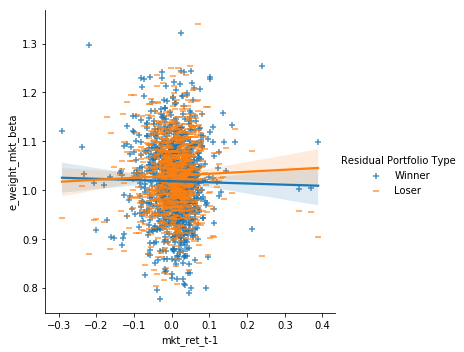

In [20]:
mkt_reversal = sns.lmplot(x="mkt_ret_t-1", y="e_weight_mkt_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('3_factor_mkt_reversal.png')

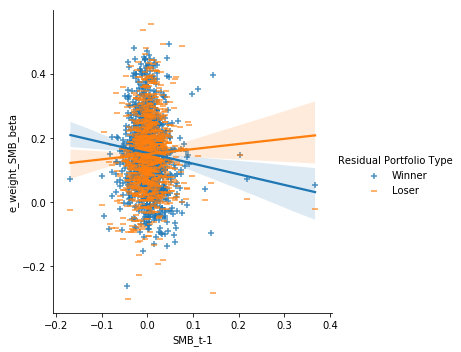

In [21]:
SMB_reversal = sns.lmplot(x="SMB_t-1", y="e_weight_SMB_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('3_factor_SMB_reversal.png')

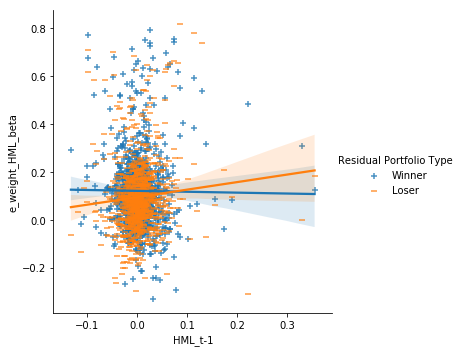

In [22]:
HML_reversal = sns.lmplot(x="HML_t-1", y="e_weight_HML_beta", hue='Residual Portfolio Type',
               truncate=True,  data=graph,  markers=["+", "_"])
plt.savefig('3_factor_HML_reversal.png')